In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from warnings import simplefilter
from sklearn.metrics import roc_curve, auc
import matplotlib.lines as mlines
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [21]:
dataset = pd.read_csv("/content/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
# Pre processing
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [23]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [25]:
# Categorical data points exploration
# Gender, Geography are the useful data points, where as surname is of no significance for the model.
dataset.groupby("Gender")["Gender"].count()

Gender
Female    4543
Male      5457
Name: Gender, dtype: int64

In [26]:
dataset.groupby("Geography")["Geography"].count()

Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [28]:
dataset["Gender"] = pd.Categorical(dataset["Gender"])
dataset["Gender"] = dataset["Gender"].cat.codes
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [29]:
dataset["Geography"] = pd.Categorical(dataset["Geography"])
dataset["Geography"] = dataset["Geography"].cat.codes
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [30]:
dataset['CreditScoreBin'] = pd.cut(dataset['CreditScore'], [0, 450, 550,650,750,900])
dataset["CreditScoreBin"] = pd.Categorical(dataset["CreditScoreBin"])
dataset["CreditScoreBin"] = dataset["CreditScoreBin"].cat.codes
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreBin
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,2
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,2
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,3
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,4


In [31]:
# Binning Balance
dataset['BalanceBin'] = pd.cut(dataset['Balance'], [-1, 50000, 100000,150000,200000,1000000000000000])

dataset["BalanceBin"] = pd.Categorical(dataset["BalanceBin"])
dataset["BalanceBin"] = dataset["BalanceBin"].cat.codes
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreBin,BalanceBin
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,2,0
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,2,1
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,3,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,4,2


In [32]:
# Binning Estimated Salary
dataset['EstimatedSalaryBin'] = pd.cut(dataset['EstimatedSalary'], [-1, 50000, 100000,150000,200000,1000000000000000])

dataset["EstimatedSalaryBin"] = pd.Categorical(dataset["EstimatedSalaryBin"])
dataset["EstimatedSalaryBin"] = dataset["EstimatedSalaryBin"].cat.codes
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreBin,BalanceBin,EstimatedSalaryBin
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,2,0,2
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,2,1,2
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,2
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,3,0,1
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,4,2,1


In [33]:
# Age binning
dataset["AgeBin"] = pd.cut(dataset['Age'], [0, 16, 32,48,64,150])
dataset["AgeBin"] = pd.Categorical(dataset["AgeBin"])
dataset["AgeBin"] = dataset["AgeBin"].cat.codes
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreBin,BalanceBin,EstimatedSalaryBin,AgeBin
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1,2,0,2,2
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0,2,1,2,2
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,2,2
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0,3,0,1,2
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0,4,2,1,2


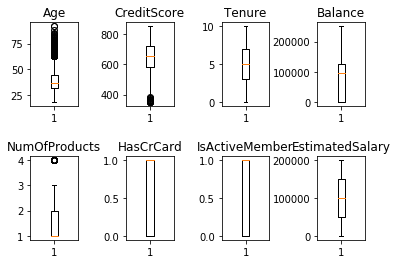

In [34]:
# Exploratory Analysis
# Box plot
fig, ((a,b,c,d),(e,f,g,h)) = plt.subplots(2,4)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=1, hspace=0.6)

a.set_title("Age")
a.boxplot(dataset["Age"])
b.set_title("CreditScore")
b.boxplot(dataset["CreditScore"])
c.set_title("Tenure")
c.boxplot(dataset["Tenure"])
d.set_title("Balance")
d.boxplot(dataset["Balance"])
e.set_title("NumOfProducts")
e.boxplot(dataset["NumOfProducts"])
f.set_title("HasCrCard")
f.boxplot(dataset["HasCrCard"])
g.set_title("IsActiveMember")
g.boxplot(dataset["IsActiveMember"])
h.set_title("EstimatedSalary")
h.boxplot(dataset["EstimatedSalary"])
plt.show()




In [35]:
# Correlation
dataset.corr()["Exited"]

RowNumber            -0.016571
CustomerId           -0.006248
CreditScore          -0.027094
Geography             0.035943
Gender               -0.106512
Age                   0.285323
Tenure               -0.014001
Balance               0.118533
NumOfProducts        -0.047820
HasCrCard            -0.007138
IsActiveMember       -0.156128
EstimatedSalary       0.012097
Exited                1.000000
CreditScoreBin       -0.031312
BalanceBin            0.117289
EstimatedSalaryBin    0.013660
AgeBin                0.256200
Name: Exited, dtype: float64

In [0]:
# Remove the non-necessary fields
dataset = dataset.drop(["CustomerId"], axis=1)
dataset = dataset.drop(["Surname"], axis=1)
dataset = dataset.drop(["RowNumber"], axis=1)
dataset = dataset.drop(["Age"], axis=1)
dataset = dataset.drop(["CreditScore"], axis=1)
dataset = dataset.drop(["Balance"], axis=1)
dataset = dataset.drop(["EstimatedSalary"], axis=1)

In [37]:
dataset.head()

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,CreditScoreBin,BalanceBin,EstimatedSalaryBin,AgeBin
0,0,0,2,1,1,1,1,2,0,2,2
1,2,0,1,1,0,1,0,2,1,2,2
2,0,0,8,3,1,0,1,1,3,2,2
3,0,0,1,2,0,0,0,3,0,1,2
4,2,0,2,1,1,1,0,4,2,1,2


In [0]:
# Split data into train and test datasets
x_train,x_test , y_train, y_test = train_test_split(dataset.drop(["Exited"],axis=1),dataset["Exited"],test_size =0.2,random_state=1)

### Logistic regression

In [0]:
param_grid = {'C': [0.01, 0.1, 1,10,100] ,'penalty' : ['l1', 'l2']}
model1 = GridSearchCV(LogisticRegression(), param_grid,cv=10)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [40]:
model1.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
model1.best_params_

{'C': 1, 'penalty': 'l2'}

In [0]:
# Prediction
y_pred = model1.predict(x_test)

In [43]:
# Accuracy metrics
acc_log = round(model1.score(x_test, y_test), 3)
print("accuracy:", acc_log)
# Confusion Matrix
confusion_matrix(y_test, y_pred)

accuracy: 0.808


array([[1554,   31],
       [ 353,   62]])

In [44]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(1554, 31, 353, 62)

0.7358899319676181


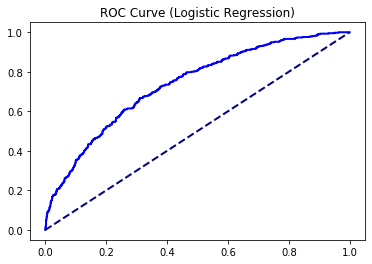

In [45]:
# ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_proba = model1.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr,tpr)
print(roc_auc)
plt.title("ROC Curve (Logistic Regression)")
plt.plot(fpr, tpr, color='blue',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

In [46]:
# Naive Bayes classification

model2 = GaussianNB(priors=None)
# Train classifier
model2.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
# Predict 
y_pred = model2.predict(x_test)
# Accuracy metrics
acc_log = accuracy_score(y_test,y_pred)
print("accuracy:", acc_log)
# Confusion Matrix
confusion_matrix(y_test, y_pred)
confusion_matrix

accuracy: 0.823


<function sklearn.metrics.classification.confusion_matrix>

0.796000152027669


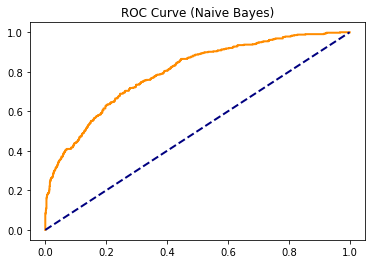

In [48]:
# ROC curve

fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_proba = model2.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr,tpr)
print(roc_auc)

plt.title("ROC Curve (Naive Bayes)")
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

In [49]:
# Decision Trees
max_depths = np.linspace(1, 10, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
param_grid = {'min_samples_leaf':min_samples_leafs,'max_depth':max_depths}


model3 = GridSearchCV(tree.DecisionTreeClassifier(), param_grid,cv=10)
model3.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'min_samples_

In [50]:
# Predict test data
y_pred = model3.predict(x_test)
# Accuracy metrics
acc_log = accuracy_score(y_test,y_pred)
print("accuracy:", acc_log)
# Confusion Matrix
confusion_matrix(y_test, y_pred)

accuracy: 0.7925


array([[1585,    0],
       [ 415,    0]])

0.6213294819657178


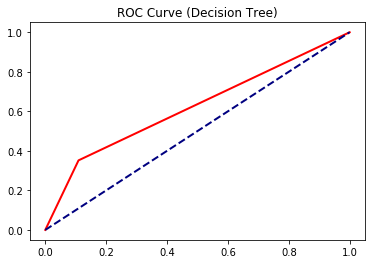

In [51]:
# ROC Curve for Decision Tree

fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_proba = model3.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr,tpr)
print(roc_auc)

plt.title("ROC Curve (Decision Tree)")
plt.plot(fpr, tpr, color='red',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

In [52]:
params = {'n_neighbors':[i for i in range(1,50,2)]}
model4 = GridSearchCV(KNeighborsClassifier(), param_grid=params,cv=10)
model4.fit(x_train,y_train)
print("Best Hyper Parameters:",model3.best_params_)

Best Hyper Parameters: {'max_depth': 1.0, 'min_samples_leaf': 0.1}


In [0]:
# Predict test data
y_pred = model4.predict(x_test)

In [54]:
# Accuracy metrics
acc_log = accuracy_score(y_test,y_pred)
print("accuracy:", acc_log)
# Confusion Matrix
confusion_matrix(y_test, y_pred)

accuracy: 0.816


array([[1563,   22],
       [ 346,   69]])

0.7712295237733268


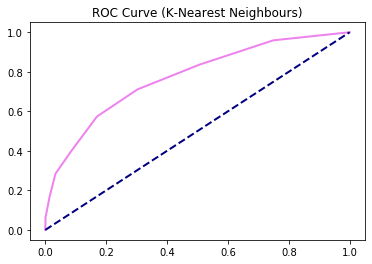

In [55]:
# ROC Curve for KNNs

fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_proba = model4.predict_proba(x_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr,tpr)
print(roc_auc)

plt.title("ROC Curve (K-Nearest Neighbours)")
plt.plot(fpr, tpr, color='violet',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

In [58]:
Cs = [0.1, 1]
kernels = ['rbf']
# gammas = [0.1,1,3]
degrees = [2,3]
param_grid = {'kernel':kernels,'degree':degrees,'C':Cs}


model5 = GridSearchCV(svm.SVC(probability=True), param_grid,cv=10)
model5.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1], 'degree': [2, 3], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [60]:
model5.best_params_

{'C': 1, 'degree': 2, 'kernel': 'rbf'}

In [63]:
# Prediction
y_pred = model5.predict(x_test)
# Accuracy metrics
acc_log = round(model5.score(x_test, y_test), 3)
print("accuracy:", acc_log)
# Confusion Matrix
confusion_matrix(y_test, y_pred)

accuracy: 0.836


array([[1567,   18],
       [ 311,  104]])

0.8065311086617765


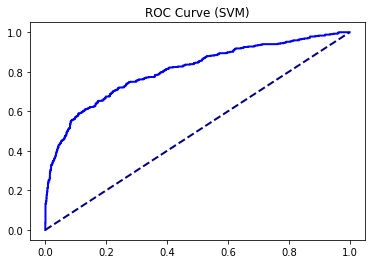

In [65]:
# ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_proba = model5.predict_proba(x_test)[:,0]#complement
fpr, tpr, thresholds = roc_curve(y_test, 1-y_pred_proba)

roc_auc = auc(fpr,tpr)
print(roc_auc)
plt.title("ROC Curve (SVM)")
plt.plot(fpr, tpr, color='blue',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()

{0: 0.7358899319676181, 1: 0.796000152027669, 2: 0.6213294819657178, 3: 0.7712295237733268, 4: 0.8065311086617765}


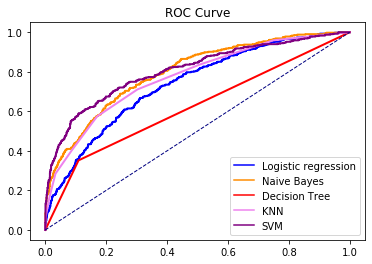

In [67]:
# ROC comparision among 6 models

fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_proba_lr = model1.predict_proba(x_test)[::,1]
y_pred_proba_nb = model2.predict_proba(x_test)[::,1]
y_pred_proba_dt = model3.predict_proba(x_test)[::,1]
y_pred_proba_knn = model4.predict_proba(x_test)[::,1]
y_pred_proba_svm = model5.predict_proba(x_test)[::,0]

fpr[0], tpr[0], thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
fpr[1], tpr[1], thresholds_nb = roc_curve(y_test, y_pred_proba_nb)
fpr[2], tpr[2], thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
fpr[3], tpr[3], thresholds_knn = roc_curve(y_test, y_pred_proba_knn)
fpr[4], tpr[4], thresholds_svm = roc_curve(y_test, 1-y_pred_proba_svm)

roc_auc[0] = auc(fpr[0],tpr[0])
roc_auc[1] = auc(fpr[1],tpr[1])
roc_auc[2] = auc(fpr[2],tpr[2])
roc_auc[3] = auc(fpr[3],tpr[3])
roc_auc[4] = auc(fpr[4],tpr[4])
print(roc_auc)
colors = ['blue', 'darkorange','red',"violet","purple"]
titles = ["Logistic","Naive Bayes","Decision Tree", "KNN","SVM"]
plt.title("ROC Curve")
for i in range(len(roc_auc)):
    plt.plot(fpr[i], tpr[i], color=colors[i],lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
blue_line = mlines.Line2D([], [], color='blue', label='Logistic regression')
orange_line = mlines.Line2D([], [], color='darkorange', label='Naive Bayes')
red_line = mlines.Line2D([], [], color='red', label='Decision Tree')
violet_line = mlines.Line2D([], [], color='violet', label='KNN')
purple_line = mlines.Line2D([], [], color='purple', label='SVM')
plt.legend(handles=[blue_line, orange_line, red_line, violet_line, purple_line])
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.show()